In [1]:
import numpy as np
import pandas as pd 
from texttable import Texttable
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plotting
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)

cervical_cancer = pd.read_csv('kag_risk_factors_cervical_cancer.csv')
print(cervical_cancer.head())
print("\n")

   Age Number of sexual partners First sexual intercourse Num of pregnancies  \
0   18                       4.0                     15.0                1.0   
1   15                       1.0                     14.0                1.0   
2   34                       1.0                        ?                1.0   
3   52                       5.0                     16.0                4.0   
4   46                       3.0                     21.0                4.0   

  Smokes Smokes (years) Smokes (packs/year) Hormonal Contraceptives  \
0    0.0            0.0                 0.0                     0.0   
1    0.0            0.0                 0.0                     0.0   
2    0.0            0.0                 0.0                     0.0   
3    1.0           37.0                37.0                     1.0   
4    0.0            0.0                 0.0                     1.0   

  Hormonal Contraceptives (years)  IUD IUD (years) STDs STDs (number)  \
0                  

In [3]:
#CHECKING FOR DATATYPES
print(cervical_cancer.dtypes)
print("\n")

#CONVERTING THEM FROM OBJECT TO RESPECTIVE DATATYPES
for i in range(1,28):
    cervical_cancer.iloc[:,i]=pd.to_numeric(cervical_cancer.iloc[:,i], errors='coerce')
print(cervical_cancer.dtypes)
print("\n")

Age                                    int64
Number of sexual partners             object
First sexual intercourse              object
Num of pregnancies                    object
Smokes                                object
Smokes (years)                        object
Smokes (packs/year)                   object
Hormonal Contraceptives               object
Hormonal Contraceptives (years)       object
IUD                                   object
IUD (years)                           object
STDs                                  object
STDs (number)                         object
STDs:condylomatosis                   object
STDs:cervical condylomatosis          object
STDs:vaginal condylomatosis           object
STDs:vulvo-perineal condylomatosis    object
STDs:syphilis                         object
STDs:pelvic inflammatory disease      object
STDs:genital herpes                   object
STDs:molluscum contagiosum            object
STDs:AIDS                             object
STDs:HIV  

In [4]:
#CHECKING FOR NULL VALUES

full_headers = cervical_cancer.columns
values = list(cervical_cancer.isnull().sum())
nullList = []
nullList.append(['Feature','Null Values count'])
for i in range(len(full_headers)):
    nullList.append([full_headers[i],values[i]])

table = Texttable()
table.add_rows(nullList)
print(table.draw())    
print("\n")

+------------------------------------+-------------------+
|              Feature               | Null Values count |
+====================================+===================+
| Age                                | 0                 |
+------------------------------------+-------------------+
| Number of sexual partners          | 26                |
+------------------------------------+-------------------+
| First sexual intercourse           | 7                 |
+------------------------------------+-------------------+
| Num of pregnancies                 | 56                |
+------------------------------------+-------------------+
| Smokes                             | 13                |
+------------------------------------+-------------------+
| Smokes (years)                     | 13                |
+------------------------------------+-------------------+
| Smokes (packs/year)                | 13                |
+------------------------------------+------------------

In [5]:
#DATA IMPUTATION

cervical_cancer['Number of sexual partners'].fillna(cervical_cancer['Number of sexual partners'].median(), inplace=True)
cervical_cancer['First sexual intercourse'].fillna(cervical_cancer['First sexual intercourse'].median(), inplace=True)
cervical_cancer['Num of pregnancies'].fillna(cervical_cancer['Num of pregnancies'].median(), inplace=True)
cervical_cancer['Smokes (years)'].fillna(cervical_cancer['Smokes (years)'].median(), inplace=True)
cervical_cancer['Smokes (packs/year)'].fillna(cervical_cancer['Smokes (packs/year)'].median(), inplace=True)
cervical_cancer['Hormonal Contraceptives (years)'].fillna(cervical_cancer['Hormonal Contraceptives (years)'].median(), inplace=True)
cervical_cancer['STDs (number)'].fillna(cervical_cancer['STDs (number)'].median(), inplace=True)
cervical_cancer['STDs: Time since first diagnosis'].fillna(cervical_cancer['STDs: Time since first diagnosis'].median(), inplace=True)
cervical_cancer['STDs: Time since last diagnosis'].fillna(cervical_cancer['STDs: Time since last diagnosis'].median(), inplace=True)
cervical_cancer['IUD (years)'].fillna(cervical_cancer['IUD (years)'].median(), inplace=True)

#Discrete variable imputation (without population estimates)
cervical_cancer['STDs:condylomatosis'].fillna(cervical_cancer['STDs:condylomatosis'].median(), inplace=True)
cervical_cancer['STDs:cervical condylomatosis'].fillna(cervical_cancer['STDs:cervical condylomatosis'].median(), inplace=True)
cervical_cancer['STDs:vaginal condylomatosis'].fillna(cervical_cancer['STDs:vaginal condylomatosis'].median(), inplace=True)
cervical_cancer['STDs:vulvo-perineal condylomatosis'].fillna(cervical_cancer['STDs:vulvo-perineal condylomatosis'].median(), inplace=True)
cervical_cancer['STDs:syphilis'].fillna(cervical_cancer['STDs:syphilis'].median(), inplace=True)
cervical_cancer['STDs:molluscum contagiosum'].fillna(cervical_cancer['STDs:molluscum contagiosum'].median(), inplace=True)
cervical_cancer['STDs'].fillna(cervical_cancer['STDs'].median(), inplace=True)
cervical_cancer['STDs:AIDS'].fillna(cervical_cancer['STDs:AIDS'].median(), inplace=True)
cervical_cancer['STDs:HIV'].fillna(cervical_cancer['STDs:HIV'].median(), inplace=True)


#Discrete variable imputation (with population estimates)
s = int(.136*cervical_cancer.shape[0])
smokes = np.hstack((np.ones(s), np.zeros(cervical_cancer.shape[0]-s)))
np.random.shuffle(smokes)
cervical_cancer['Smokes'].fillna(pd.Series(smokes), axis=0, inplace=True)

s = int(.103*cervical_cancer.shape[0])
iud = np.hstack((np.ones(s), np.zeros(cervical_cancer.shape[0]-s)))
np.random.shuffle(iud)
cervical_cancer['IUD'].fillna(pd.Series(iud), axis=0, inplace=True)

s = int(.229*cervical_cancer.shape[0])
hc = np.hstack((np.ones(s), np.zeros(cervical_cancer.shape[0]-s)))
np.random.shuffle(hc)
cervical_cancer['Hormonal Contraceptives'].fillna(pd.Series(hc), axis=0, inplace=True)

s = int(.399*cervical_cancer.shape[0])
hpv = np.hstack((np.ones(s), np.zeros(cervical_cancer.shape[0]-s)))
np.random.shuffle(hpv)
cervical_cancer['STDs:HPV'].fillna(pd.Series(hpv), axis=0, inplace=True)

s = int(.034*cervical_cancer.shape[0])
hep = np.hstack((np.ones(s), np.zeros(cervical_cancer.shape[0]-s)))
np.random.shuffle(hep)
cervical_cancer['STDs:Hepatitis B'].fillna(pd.Series(hep), axis=0, inplace=True)

s = int(.159*cervical_cancer.shape[0])
gen = np.hstack((np.ones(s), np.zeros(cervical_cancer.shape[0]-s)))
np.random.shuffle(gen)
cervical_cancer['STDs:genital herpes'].fillna(pd.Series(gen), axis=0, inplace=True)

s = int(.044*cervical_cancer.shape[0])
pid = np.hstack((np.ones(s), np.zeros(cervical_cancer.shape[0]-s)))
np.random.shuffle(pid)
cervical_cancer['STDs:pelvic inflammatory disease'].fillna(pd.Series(pid), axis=0, inplace=True)


#NULL VALUES AFTER DATA IMPUTATION
full_headers = cervical_cancer.columns
values = list(cervical_cancer.isnull().sum())
nullList = []
nullList.append(['Feature','Null Values count'])
for i in range(len(full_headers)):
    nullList.append([full_headers[i],values[i]])

table = Texttable()
table.add_rows(nullList)
print(table.draw())    
print("\n")

+------------------------------------+-------------------+
|              Feature               | Null Values count |
+====================================+===================+
| Age                                | 0                 |
+------------------------------------+-------------------+
| Number of sexual partners          | 0                 |
+------------------------------------+-------------------+
| First sexual intercourse           | 0                 |
+------------------------------------+-------------------+
| Num of pregnancies                 | 0                 |
+------------------------------------+-------------------+
| Smokes                             | 0                 |
+------------------------------------+-------------------+
| Smokes (years)                     | 0                 |
+------------------------------------+-------------------+
| Smokes (packs/year)                | 0                 |
+------------------------------------+------------------

In [6]:
#IMPORTING DATA

predictors = cervical_cancer.columns[0:35]
crux = "Biopsy"

X_s = cervical_cancer.loc[:,predictors]
Y_s = np.ravel(cervical_cancer.loc[:,[crux]])
X = cervical_cancer.loc[:,predictors]
Y = np.ravel(cervical_cancer.loc[:,[crux]])

In [7]:
#RANDOM FOREST BEFORE NORMALIZATION AND PCA - > BENCHMARK

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  cross_val_score, cross_val_predict

rf = RandomForestClassifier()
sc = cross_val_score(rf, X_s, Y_s, scoring='accuracy').mean()
print("Benchmark-> Accuracy before Norm and PCA:- %s"%round(sc*100,2))

Benchmark-> Accuracy before Norm and PCA:- 95.11


{0: 803, 1: 55}


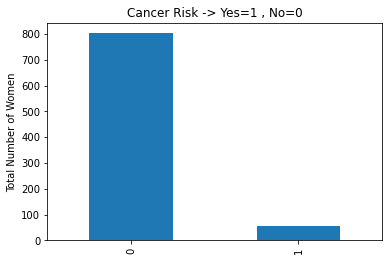

In [8]:
#CHECKING FOR CLASS IMBALANCE

imbalance = dict(cervical_cancer['Biopsy'].value_counts())
print(imbalance)

cervical_cancer.Biopsy.value_counts().plot(kind='bar')
plotting.title("Cancer Risk -> Yes=1 , No=0")
plotting.ylabel("Total Number of Women")
plotting.show()

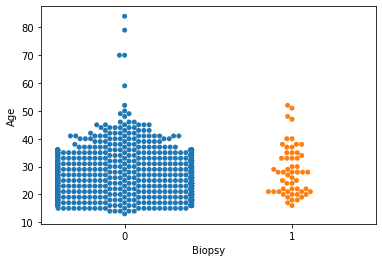

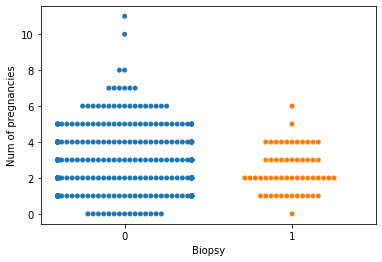

In [9]:
sns.swarmplot(y='Age',x='Biopsy', data=cervical_cancer)
plotting.show()
print("\n")

sns.swarmplot(y='Num of pregnancies',x='Biopsy', data=cervical_cancer)
plotting.show()
print("\n")


The histograms of the attributes are given below:


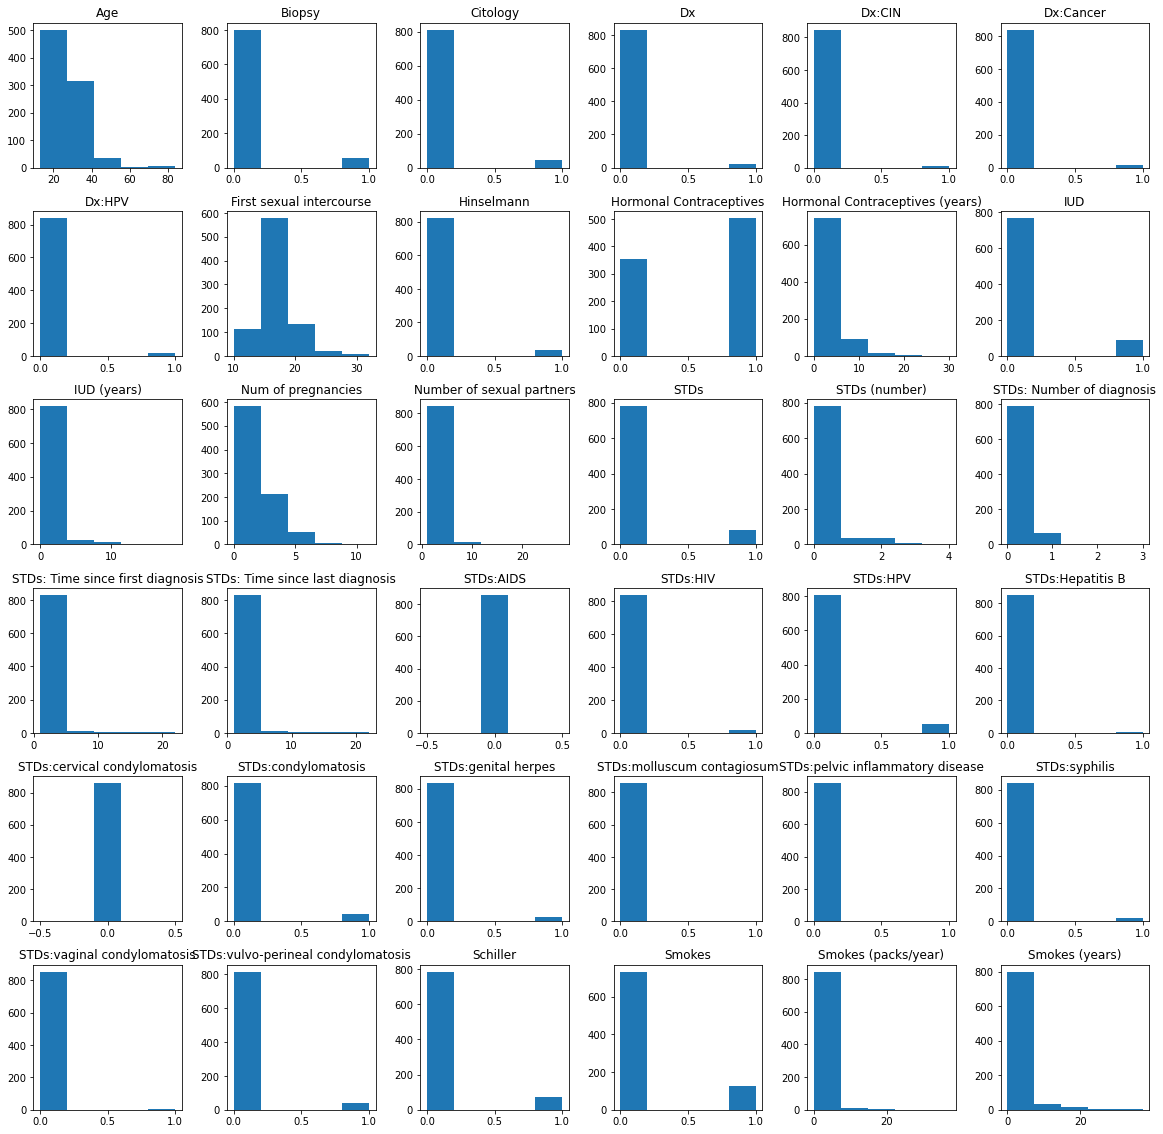

In [10]:
#CHECKING FOR NORMALIZATION

print("\nThe histograms of the attributes are given below:")
cervical_cancer.hist(bins=5,grid=False,layout=[6,6],figsize=[20,20])
plotting.show()
print("\n")

The correlation heatmap is shown below:


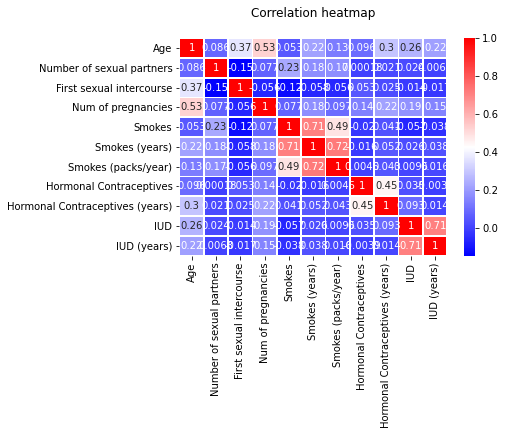

In [11]:
#CHECKING FOR CORRELATION
print("The correlation heatmap is shown below:")

c_corr = cervical_cancer.drop(['STDs','STDs (number)','STDs:condylomatosis','STDs:cervical condylomatosis',
                               'STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis','STDs:syphilis','STDs:pelvic inflammatory disease',
                               'STDs:genital herpes','STDs:molluscum contagiosum','STDs:AIDS','STDs:HIV','STDs:Hepatitis B','STDs:HPV','STDs: Number of diagnosis',
                               'STDs: Time since first diagnosis','STDs: Time since last diagnosis','Biopsy','Hinselmann','Schiller','Citology','Dx:Cancer','Dx:CIN','Dx:HPV','Dx'],axis=1)

correlation = c_corr.corr()
heatmap = sns.heatmap(correlation, cbar=True, annot=True, cmap="bwr", linewidths=.75)
heatmap.set_title("Correlation heatmap\n")
plotting.show()
print("\n")

In [12]:
#BEFORE FEATURE SCALING
biopsy_values = cervical_cancer['Biopsy']
cervical_cancer = cervical_cancer.drop(columns=['Biopsy'],axis=1)
headers = cervical_cancer.columns
minimum = list(map(lambda x: round(x,4),cervical_cancer.min()))
mean = list(map(lambda x: round(x,4),cervical_cancer.mean()))
maximum = list(map(lambda x: round(x,4),cervical_cancer.max()))
std =list(map(lambda x: round(x,4),cervical_cancer.std()))

before_scaling=[]
before_scaling.append(['Feature','Min','Mean','Max','Std. Dev'])
before_scaling.append(['Biopsy',biopsy_values.min(),biopsy_values.mean(),biopsy_values.max(),biopsy_values.std()])
for i in range(len(headers)):
    before_scaling.append([headers[i],minimum[i],mean[i],maximum[i],std[i]])

print("\nBEFORE FEATURE SCALING")
table1 = Texttable()
table1.add_rows(before_scaling)
print(table1.draw())
print("\n")


BEFORE FEATURE SCALING
+------------------------------------+-----+--------+-----+----------+
|              Feature               | Min |  Mean  | Max | Std. Dev |
+====================================+=====+========+=====+==========+
| Biopsy                             | 0   | 0.064  | 1   | 0.245    |
+------------------------------------+-----+--------+-----+----------+
| Age                                | 13  | 26.820 | 84  | 8.498    |
+------------------------------------+-----+--------+-----+----------+
| Number of sexual partners          | 1   | 2.512  | 28  | 1.645    |
+------------------------------------+-----+--------+-----+----------+
| First sexual intercourse           | 10  | 16.995 | 32  | 2.792    |
+------------------------------------+-----+--------+-----+----------+
| Num of pregnancies                 | 0   | 2.258  | 11  | 1.401    |
+------------------------------------+-----+--------+-----+----------+
| Smokes                             | 0   | 0.147  |

In [13]:
#AFTER FEATURE SCALING

cervical_cancer = pd.DataFrame(preprocessing.scale(cervical_cancer.iloc[:,0:35]))

minimum = list(map(lambda x: round(x,4),cervical_cancer.min()))
mean = list(map(lambda x: round(x,4),cervical_cancer.mean()))
maximum = list(map(lambda x: round(x,4),cervical_cancer.max()))
std =list(map(lambda x: round(x,4),cervical_cancer.std()))

after_scaling=[]
after_scaling.append(['Feature','Min','Mean','Max','Std. Dev'])
after_scaling.append(['Biopsy',biopsy_values.min(),biopsy_values.mean(),biopsy_values.max(),biopsy_values.std()])
for i in range(len(headers)):
    after_scaling.append([headers[i],minimum[i],mean[i],maximum[i],std[i]])

print("\nAFTER FEATURE SCALING")
table2 = Texttable()
table2.add_rows(after_scaling)
print(table2.draw())
print("\n")


AFTER FEATURE SCALING
+------------------------------------+--------+-------+--------+----------+
|              Feature               |  Min   | Mean  |  Max   | Std. Dev |
+====================================+========+=======+========+==========+
| Biopsy                             | 0      | 0.064 | 1      | 0.245    |
+------------------------------------+--------+-------+--------+----------+
| Age                                | -1.627 | 0     | 6.732  | 1.001    |
+------------------------------------+--------+-------+--------+----------+
| Number of sexual partners          | -0.920 | 0     | 15.506 | 1.001    |
+------------------------------------+--------+-------+--------+----------+
| First sexual intercourse           | -2.507 | 0     | 5.378  | 1.001    |
+------------------------------------+--------+-------+--------+----------+
| Num of pregnancies                 | -1.612 | 0     | 6.244  | 1.001    |
+------------------------------------+--------+-------+--------+-

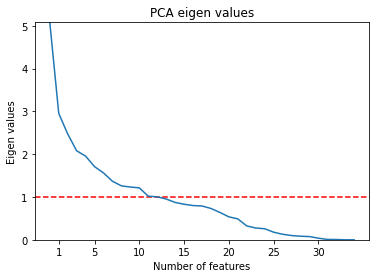

<Figure size 36000x36000 with 0 Axes>

In [14]:
#PRINCIPAL COMPONENT ANALYSIS

pca = PCA(n_components=len(cervical_cancer.columns))
pca.fit_transform(cervical_cancer)
components = abs(pca.components_)
eigen_values = pca.explained_variance_
ratio_values = pca.explained_variance_ratio_
plotting.ylabel("Eigen values")
plotting.xlabel("Number of features")
plotting.title("PCA eigen values")
plotting.ylim(0, max(eigen_values))
plotting.xticks([1,5,10,15,20,25,30])
plotting.style.context('seaborn-whitegrid')
plotting.axhline(y=1,color='r',linestyle='--')
plotting.plot(eigen_values)
plotting.figure(figsize=(500,500))
plotting.show()
print("\n")

In [15]:
tableList=[]
tableList.append(["NC","SP","EV","CEV"])
for i in range(len(eigen_values)):
    total=0
    for j in range(i+1):
        total+=ratio_values[j]
    tableList.append([i+1,round(eigen_values[i],2),round(ratio_values[i],2),round(total*100,2)])


print("\nPCA Table")
table3 = Texttable()
table3.add_rows(tableList)
print(table3.draw())
print("\n")


PCA Table
+----+-------+-------+--------+
| NC |  SP   |  EV   |  CEV   |
+====+=======+=======+========+
| 1  | 5.080 | 0.150 | 15.380 |
+----+-------+-------+--------+
| 2  | 2.950 | 0.090 | 24.320 |
+----+-------+-------+--------+
| 3  | 2.470 | 0.070 | 31.800 |
+----+-------+-------+--------+
| 4  | 2.080 | 0.060 | 38.100 |
+----+-------+-------+--------+
| 5  | 1.960 | 0.060 | 44.020 |
+----+-------+-------+--------+
| 6  | 1.710 | 0.050 | 49.190 |
+----+-------+-------+--------+
| 7  | 1.560 | 0.050 | 53.920 |
+----+-------+-------+--------+
| 8  | 1.370 | 0.040 | 58.060 |
+----+-------+-------+--------+
| 9  | 1.260 | 0.040 | 61.880 |
+----+-------+-------+--------+
| 10 | 1.230 | 0.040 | 65.610 |
+----+-------+-------+--------+
| 11 | 1.210 | 0.040 | 69.280 |
+----+-------+-------+--------+
| 12 | 1.020 | 0.030 | 72.370 |
+----+-------+-------+--------+
| 13 | 1     | 0.030 | 75.410 |
+----+-------+-------+--------+
| 14 | 0.950 | 0.030 | 78.290 |
+----+-------+-------+-------

In [16]:
#SPLITTING DATA INTO X AND Y

pca_new = PCA(n_components=12)
cervical_cancer = pca_new.fit_transform(cervical_cancer)

X = pd.DataFrame(cervical_cancer)
Y = pd.DataFrame(biopsy_values)
print(cervical_cancer.shape)
print(X.shape)
print(Y.shape)

(858, 12)
(858, 12)
(858, 1)


In [17]:
#SPLITTING DATASET FOR TRANINING AND SPLITTING

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
print('Original Data Set',cervical_cancer.shape)
print('Shape of X training set : ',X_train.shape,' || Shape of test set : ',X_test.shape) 
print('Shape of Y training set : ',Y_train.shape,' || Shape of test set : ',Y_test.shape) 

Original Data Set (858, 12)
Shape of X training set :  (600, 12)  || Shape of test set :  (258, 12)
Shape of Y training set :  (600, 1)  || Shape of test set :  (258, 1)


In [18]:
table_report=[]
table_report.append(["Model","Acc","Prec","Recall","F1"])
global count_lis
count_lis = 1

In [19]:
#PRINT FUNCTION

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

def truncate(f, n):
    return np.floor(f * 10 ** n) / 10 ** n

def evaluate(sco, model, X_train, X_test, y_train, y_test):
    global count_lis
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    acc = round(sco*100,2)
    #print(f"Accuracy %s" % round(accuracy_score(y_train, y_train_pred)*100,2))
    lisp =[]
    lisp = truncate(clf_report.mean(axis = 1).astype(float),2)
    table_report.append([count_lis,acc,lisp['precision'],lisp['recall'],lisp['f1-score']])
    count_lis = count_lis+1

In [20]:
#SVM TUNING

from sklearn import svm
from sklearn.svm import SVC

svm = svm.SVC()
sc = cross_val_score(svm, X_train, Y_train, scoring='accuracy', cv=10).mean()

svm_clf = SVC()
svm_clf.fit(X_train, Y_train)
evaluate(sc, svm_clf, X_train, X_test, Y_train, Y_test)

scores = {
    'SVM Tuning': {
        'Train': accuracy_score(Y_train, svm_clf.predict(X_train)),
        'Test': accuracy_score(Y_test, svm_clf.predict(X_test)),
    },
}

print("SVM Tuning Accuracy :- %s" % round(sc*100,2))
print(svm_clf.predict(X_test))

SVM Tuning Accuracy :- 93.83
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0]


In [21]:
#LOGISTIC REGRESSION MODEL

from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
sc = cross_val_score(lr_clf, X_train, Y_train, scoring='accuracy' ,cv=10).mean()

lr_clf.fit(X_train, Y_train)
evaluate(sc, lr_clf, X_train, X_test, Y_train, Y_test)

scores['LogisticRegression'] = {
        'Train': accuracy_score(Y_train, lr_clf.predict(X_train)),
        'Test': accuracy_score(Y_test, lr_clf.predict(X_test)),
    }

print("Logistic regression accuracy :- %s" % round(sc*100,2))
print(lr_clf.predict(X_test))

Logistic regression accuracy :- 96.17
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0]


In [22]:
#ADABOOST

from sklearn.ensemble import AdaBoostClassifier

#adb_clf = AdaBoostClassifier(n_estimators=100, random_state=0)
adb_clf = AdaBoostClassifier()
sc = cross_val_score(adb_clf, X_train, Y_train, scoring='accuracy' ,cv=10).mean()

adb_clf.fit(X_train, Y_train)
evaluate(sc, adb_clf, X_train, X_test, Y_train, Y_test)

scores['AdaBoost'] = {
        'Train': accuracy_score(Y_train, adb_clf.predict(X_train)),
        'Test': accuracy_score(Y_test, adb_clf.predict(X_test)),
    }

print("AdaBoost Accuracy :- %s" % round(sc*100,2))
print(adb_clf.predict(X_test))

AdaBoost Accuracy :- 94.0
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0]


In [23]:
#STOCHASTIC GRADIENT DESCENT

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sc = cross_val_score(sgd_clf, X_train, Y_train, scoring='accuracy' ,cv=10).mean()

sgd_clf.fit(X_train, Y_train)
evaluate(sc, sgd_clf, X_train, X_test, Y_train, Y_test)

scores['SGDC'] = {
        'Train': accuracy_score(Y_train, sgd_clf.predict(X_train)),
        'Test': accuracy_score(Y_test, sgd_clf.predict(X_test)),
    }

print("Stochastic gradient descent Accuracy :- %s" % round(sc*100,2))

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
pipl = make_pipeline(StandardScaler(), SGDClassifier())
pipl.fit(X_train, Y_train)
print(pipl.predict(X_test))

Stochastic gradient descent Accuracy :- 93.0
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0]


In [24]:
#PERCEPTRON

from sklearn.linear_model import Perceptron

pct_clf = Perceptron()
sc = cross_val_score(pct_clf, X_train, Y_train, scoring='accuracy' ,cv=10).mean()

pct_clf.fit(X_train, Y_train)
evaluate(sc, pct_clf, X_train, X_test, Y_train, Y_test)

scores['Perceptron'] = {
        'Train': accuracy_score(Y_train, pct_clf.predict(X_train)),
        'Test': accuracy_score(Y_test, pct_clf.predict(X_test)),
    }

print("Perceptron Accuracy :- %s" % round(sc*100,2))
print(pct_clf.predict(X_test))

Perceptron Accuracy :- 92.83
[0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0]


In [25]:
#XGBOOST

from xgboost import XGBClassifier

xgb_clf = XGBClassifier(eval_metric='mlogloss')
sc = cross_val_score(xgb_clf, X_train, Y_train, scoring='accuracy', cv=10).mean()

xgb_clf.fit(X_train, Y_train)
evaluate(sc, xgb_clf, X_train, X_test, Y_train, Y_test)

scores['xgboost'] = {
        'Train': accuracy_score(Y_train, xgb_clf.predict(X_train)),
        'Test': accuracy_score(Y_test, xgb_clf.predict(X_test)),
    }

print("XGBoost Accuracy :- %s" % round((sc)*100,2))
print(xgb_clf.predict(X_test))

XGBoost Accuracy :- 95.0
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0]


In [26]:
#RANDOM FOREST AFTER NORMALIZATION AND PCA

#rf_clf = RandomForestClassifier(random_state=42, n_estimators=1000)

rf_clf = RandomForestClassifier()
sc = cross_val_score(rf_clf, X_train, Y_train, scoring='accuracy' ,cv=10).mean()

rf_clf.fit(X_train, Y_train)
evaluate(sc, rf_clf, X_train, X_test, Y_train, Y_test)

print("Random Forest Accuracy :- %s" % round((sc)*100,2))
print(rf_clf.predict(X_test))

Random Forest Accuracy :- 95.0
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0]


In [27]:
#BENCHMARK

rbf_clf = RandomForestClassifier()
sc = cross_val_score(rf_clf, X_s, Y_s, scoring='accuracy',cv=10).mean()

rbf_clf.fit(X_train, Y_train)
evaluate(sc, rbf_clf, X_train, X, Y_train, Y)
print("Benchmark-> Accuracy before Norm and PCA:- %s"%round(sc*100,2))
print(rbf_clf.predict(X))

Benchmark-> Accuracy before Norm and PCA:- 95.81
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [28]:
#KNN

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
sc = cross_val_score(knn_clf, X_train, Y_train, scoring='accuracy' ,cv=10).mean()

knn_clf.fit(X_train, Y_train)
evaluate(sc, knn_clf, X_train, X_test, Y_train, Y_test)

scores['KNN'] = {
        'Train': accuracy_score(Y_train, knn_clf.predict(X_train)),
        'Test': accuracy_score(Y_test, knn_clf.predict(X_test)),
    }

print("KNN Accuracy after Norm and PCA :- %s" % round(sc*100,2))
print(knn_clf.predict(X_test))

KNN Accuracy after Norm and PCA :- 94.67
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0]


In [29]:
#EXTREMELY RANDOMIZED TREES

from sklearn.ensemble import ExtraTreesClassifier

#clf = ExtraTreesClassifier(n_estimators=100, random_state=0)

ert_clf = ExtraTreesClassifier()
sc = cross_val_score(ert_clf, X_train, Y_train, scoring='accuracy' ,cv=10).mean()

ert_clf.fit(X_train, Y_train)
evaluate(sc, ert_clf, X_train, X_test, Y_train, Y_test)

scores['EXT'] = {
        'Train': accuracy_score(Y_train, ert_clf.predict(X_train)),
        'Test': accuracy_score(Y_test, ert_clf.predict(X_test)),
    }

print("Extremely Randomized trees Accuracy :- %s" % round(sc*100,2))
print(ert_clf.predict(X_test))


Extremely Randomized trees Accuracy :- 94.17
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0]


In [30]:
from sklearn.ensemble import VotingClassifier

estimators = []
#svm_flag = SVC(gamma='scale')
svm_flag = SVC()
estimators.append(('SVM', svm_flag))

#log_flag = LogisticRegression(solver='liblinear')
log_flag = LogisticRegression()
estimators.append(('Logistic', log_flag))

adb_flag = AdaBoostClassifier()
estimators.append(('Adaboost', adb_flag))

sgd_flag = SGDClassifier()
estimators.append(('SDGC', sgd_flag))

pct_flag = Perceptron()
estimators.append(('Percept', pct_flag))

xgb_flag = XGBClassifier(eval_metric='mlogloss')
estimators.append(('XGBboost', xgb_flag))

rf_flag = RandomForestClassifier()
estimators.append(('Randfor', rf_flag))

knn_flag = KNeighborsClassifier()
estimators.append(('KNN', knn_flag))

ert_flag = ExtraTreesClassifier()
estimators.append(('Etrarandtree', ert_flag))

#By default its hard voting
voting = VotingClassifier(estimators=estimators)
voting.fit(X_train, Y_train)

#acc = round(accuracy_score(Y_train, Y_train_pred)*100,2)
acc = round(cross_val_score(voting, X_train, Y_train ,scoring='accuracy',cv=10).mean()*100,2)

global count_lis
Y_test_pred = voting.predict(X_test)
Y_train_pred = voting.predict(X_train)

clf_report = pd.DataFrame(classification_report(Y_train, Y_train_pred, output_dict=True))

lisp =[]
lisp = truncate(clf_report.mean(axis = 1).astype(float),2)
table_report.append([count_lis,acc,lisp['precision'],lisp['recall'],lisp['f1-score']])

scores['Voting'] = {
        'Train': accuracy_score(Y_train, voting.predict(X_train)),
        'Test': accuracy_score(Y_test, voting.predict(X_test)),
    }

In [31]:
print("\nPREDICTION RESULTS")
print(" 1. SVM TUNING\n 2. LOGISTIC REGRESSION\n 3. ADABOOST\n 4. STOCHASTIC GRADIENT DESCENT\n 5. PERCEPTRO\n 6. XGBOOST\n 7. BENCHMARK (RF BEFORE SCALING AND PCA)\n 8. RANDOM FOREST (AFTER SCALING AND PCA)\n 9. KNN (K-NEAREST NEIGHBOR)\n 10. EXTREMELY RANDOMIZED TREES\n 11. ENSEMBLE VOTING CLASSIFIER")
table4 = Texttable()
table4.add_rows(table_report)
print(table4.draw())


PREDICTION RESULTS
 1. SVM TUNING
 2. LOGISTIC REGRESSION
 3. ADABOOST
 4. STOCHASTIC GRADIENT DESCENT
 5. PERCEPTRO
 6. XGBOOST
 7. BENCHMARK (RF BEFORE SCALING AND PCA)
 8. RANDOM FOREST (AFTER SCALING AND PCA)
 9. KNN (K-NEAREST NEIGHBOR)
 10. EXTREMELY RANDOMIZED TREES
 11. ENSEMBLE VOTING CLASSIFIER
+-------+--------+-------+--------+-------+
| Model |  Acc   | Prec  | Recall |  F1   |
+=======+========+=======+========+=======+
| 1     | 93.830 | 0.910 | 0.880  | 0.890 |
+-------+--------+-------+--------+-------+
| 2     | 96.170 | 0.910 | 0.880  | 0.890 |
+-------+--------+-------+--------+-------+
| 3     | 94     | 0.990 | 0.990  | 0.990 |
+-------+--------+-------+--------+-------+
| 4     | 93     | 0.810 | 0.790  | 0.800 |
+-------+--------+-------+--------+-------+
| 5     | 92.830 | 0.860 | 0.880  | 0.870 |
+-------+--------+-------+--------+-------+
| 6     | 95     | 1     | 1      | 1     |
+-------+--------+-------+--------+-------+
| 7     | 95     | 1     | 1     

+--------------------+-----------+----------+
|       Model        | Train Acc | Test Acc |
+====================+===========+==========+
| SVM Tuning         | 0.965     | 0.965    |
+--------------------+-----------+----------+
| LogisticRegression | 0.963     | 0.961    |
+--------------------+-----------+----------+
| AdaBoost           | 0.998     | 0.973    |
+--------------------+-----------+----------+
| SGDC               | 0.932     | 0.950    |
+--------------------+-----------+----------+
| Perceptron         | 0.952     | 0.946    |
+--------------------+-----------+----------+
| xgboost            | 1         | 0.965    |
+--------------------+-----------+----------+
| KNN                | 0.957     | 0.969    |
+--------------------+-----------+----------+
| EXT                | 1         | 0.969    |
+--------------------+-----------+----------+
| Voting             | 0.975     | 0.977    |
+--------------------+-----------+----------+


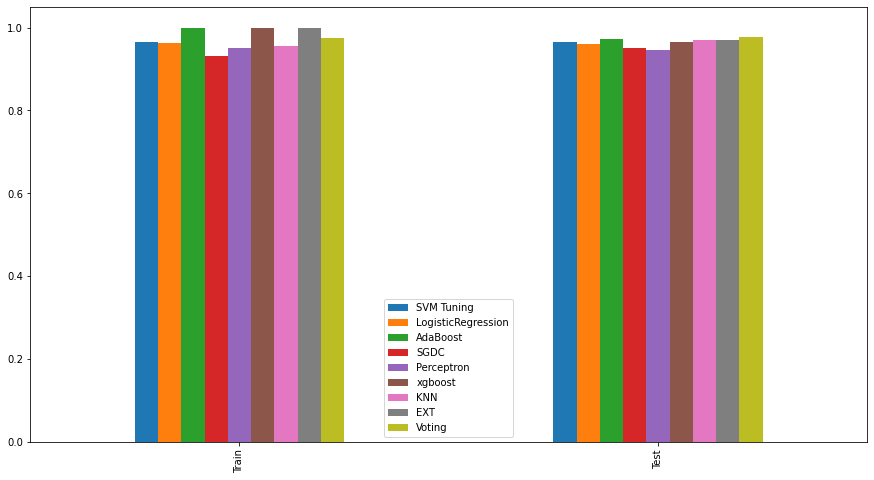

In [32]:
scores_df = pd.DataFrame(scores)

scoresList=[]
scoresList.append(["Model","Train Acc","Test Acc"])
for i in scores_df:
    li = list(scores_df[i])
    scoresList.append([i,round(li[0],4),round(li[1],4)])

table5 = Texttable()    
table5.add_rows(scoresList)
print(table5.draw())
scores_df.plot(kind='bar', figsize=(15, 8))
plotting.show()

<h1> Conclusion </h1>

The models which have atleast 95% accuracy are selected for further deductions from the table. These include 
    1. Logistic Regression
    2. Random Forest
    3. Ensemble Voting Classifier

From these three models, any of these can be used as they have higher accuracy than the rest of the models.
From the precision scores, F1 and recall scores, it can be concluded that <b>Random Forest</b> performs the best with this cervical cancer dataset.

<center> <h4> The following flowchart explains the overall steps involved</h4> </center>
<img src="flow.png"></img>